In [1]:
from BNGSim import BNGSim

/home/monoid/apps/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Replace these paths with yours. First path is the "working path" where the simulation/s will run. 
# Second is the BNG path, third will be the bngl you want to simulate. It won't be modified, just copied.
b = BNGSim("/home/monoid/test", BNGPATH="/home/monoid/apps/BioNetGen-2.4.0",
           bngl="/home/monoid/Development/BNGSim/exMISA.bngl", ncores=5)

In [3]:
b.run_simulation(nsims=2)

Given simulation path does not exist or invalid, trying to create
BNG2.pl seems to be working
Given simulation path does not exist or invalid, trying to create
BNG2.pl seems to be working
running parallel with 5 cores
Ensuring path: /home/monoid/test/00000000
Ensuring path: /home/monoid/test/00000001
Simulation succesful, loading results
Searching for existing files
Finding and loading .gdat file
Finding and loading .cdat file
Finding and loading .net file
Loaded results files
Cleanup asked, removing simulation folder /home/monoid/test/00000000
Cleaned up simulation folder
Simulation succesful, loading results
Searching for existing files
Finding and loading .gdat file
Finding and loading .cdat file
Finding and loading .net file
Loaded results files
Cleanup asked, removing simulation folder /home/monoid/test/00000001
Cleaned up simulation folder


In [4]:
b.results

In [5]:
b.combine_results()
b.save_results(fname="all_results.h5", combined=True)

Results combined in combined_results attribute


In [6]:
# Now let's pretend you are opening the results after the fact. 
# You can use b.combined_results to do the sections after this as well if you prefer but 
# I want to show off how to use the file I created
del b

import h5py
h = h5py.File("all_results.h5")
combined_results = h['combined_results'][...]

In [7]:
combined_results.shape

(2, 10001)

In [8]:
names = combined_results.dtype.names
tn,an = names[0], names[1]
t,a = combined_results[tn], combined_results[an]
print(t.shape)
print(t)

(2, 10001)
[[0.000e+00 1.000e+02 2.000e+02 ... 9.998e+05 9.999e+05 1.000e+06]
 [0.000e+00 1.000e+02 2.000e+02 ... 9.998e+05 9.999e+05 1.000e+06]]


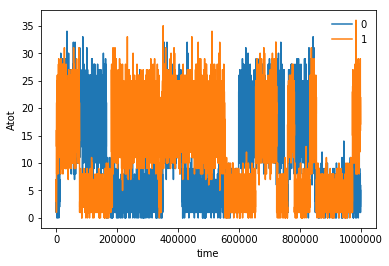

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(t.shape[0]):
    plt.plot(t[i],a[i], label="{}".format(i))
plt.xlabel(tn)
plt.ylabel(an)
plt.legend(frameon=False)
plt.show()

In [10]:
# This section will only work if you have 2 or more obs
import numpy as np

cn = names[2]
c = combined_results[cn]
atot = a.flatten()
ctot = c.flatten()

H, xed, yed = np.histogram2d(atot, ctot, bins=30)
P = H/H.max()

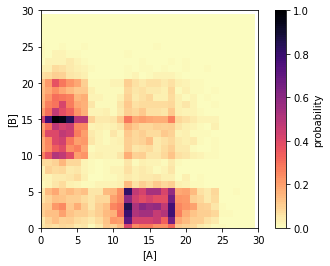

In [11]:
im = plt.imshow(P, cmap=plt.get_cmap("magma_r", 100), vmax=1)
_ = plt.colorbar(im, label="probability")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("[A]")
plt.ylabel("[B]")
plt.show()

In [ ]:
ls 